In [10]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [11]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [12]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [66]:

# Set the ticker
list_of_tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
#end_date = datetime.now()
#start_date = end_date + timedelta(-365)

start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for TSLA
df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df

AGG                                        \
                             open     high       low    close    volume   
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877   
2019-01-08 00:00:00-05:00  106.40  106.530  105.5300  106.420   3818241   
...                           ...      ...       ...      ...       ...   
2019-12-24 00:00:00-05:00  112.17  112.400  112.1300  112.375   1613641   
2019-12-26 00:00:00-05:00  112.42  112.490  112.3200  112.480   2145976   
2019-12-27 00:00:00-05:00  112.60  112.640  112.5800  112.620   3208507   
2019-12-30 00:00:00-05:00  112.42  112.645  112.3400  112.630   2513037   
2019-12-31 00:00:00-05:00  112.54  112.540  112.3650  112.370   4820587   

                              SPY                                     
                             open    high     low   close     volume  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  256.82  257.31  254.00  256.65   88864452  
...                           ...     ...     ...     ...        ...  
2019-12-24 00:00:00-05:00  321.47  321.52  320.90  321.26   15314355  
2019-12-26 00:00:00-05:00  321.65  322.93  321.64  322.91   25931139  
2019-12-27 00:00:00-05:00  323.76  323.80  322.28  322.86   35204741  
2019-12-30 00:00:00-05:00  322.95  323.10  320.55  321.10   39790325  
2019-12-31 00:00:00-05:00  320.53  322.13  320.15  321.92   36158998  

[252 rows x 10 columns]

In [67]:
# Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
df.columns = [ "AGG close", "SPY close"]

# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

df.head()

,AGG close,SPY close
2019-01-02,106.585,249.89
2019-01-03,107.020,244.46
2019-01-04,106.695,252.41
2019-01-07,106.470,254.40
2019-01-08,106.420,256.65


In [68]:
daily_returns = df.pct_change()
daily_returns.head()

,AGG close,SPY close
2019-01-02,NaN,NaN
2019-01-03,0.004081,-0.021730
2019-01-04,-0.003037,0.032521
2019-01-07,-0.002109,0.007884
2019-01-08,-0.000470,0.008844


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [69]:
# Calculate the daily roi for the stocks
AGG_avg_daily_return = daily_returns.mean()['AGG close']
SPY_avg_daily_return = daily_returns.mean()['SPY close']
print(f'AGG average daily return is {AGG_avg_daily_return}')
print(f'SPY average daily return is {SPY_avg_daily_return}')

AGG average daily return is 0.00021277231473764173
SPY average daily return is 0.0010401250682146959


In [70]:
# Calculate volatility
AGG_std_dev_daily_return = daily_returns.std()['AGG close']
SPY_std_dev_daily_return = daily_returns.std()['SPY close']

print(f'AGG daily volatility is {AGG_std_dev_daily_return}')
print(f'SPY daily daily volatility is {SPY_std_dev_daily_return}')

AGG daily volatility is 0.002089826211646555
SPY daily daily volatility is 0.007820053413439366


In [71]:
# Save the last day's closing price
AGG_last_price = df['AGG close'][-1]
SPY_last_price = df['SPY close'][-1]

In [72]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()


In [73]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_AGG_prices = [AGG_last_price]
    simulated_SPY_prices = [SPY_last_price]
    
    # Simulate the returns for 252 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_AGG_price = simulated_AGG_prices[-1] * (1 + np.random.normal(AGG_avg_daily_return, AGG_std_dev_daily_return))
        simulated_SPY_price = simulated_SPY_prices[-1] * (1 + np.random.normal(SPY_avg_daily_return, SPY_std_dev_daily_return))
        
        # Append the simulated price to the list
        simulated_AGG_prices.append(simulated_AGG_price)
        simulated_SPY_prices.append(simulated_SPY_price)
    
    # Append a simulated prices of each simulation to DataFrame
    monte_carlo["AGG prices"] = pd.Series(simulated_AGG_prices)
    monte_carlo["SPY prices"] = pd.Series(simulated_SPY_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
    
    # Set the portfolio weights (40% AGG; 60% SPY)
    weights = [0.40, 0.60]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000397,1.012342,1.010130,0.996505,1.000728,1.010624,1.012491,1.001111,0.994820,0.995954,...,1.003011,0.991617,0.996755,1.007783,1.002387,0.994367,0.997020,1.006337,0.993305,1.006721
2,1.005302,1.008838,1.006938,0.995247,0.998291,1.019183,1.008017,1.004554,0.996399,0.990254,...,1.013081,0.994618,0.989905,1.013994,1.000732,0.994951,1.008901,1.009089,0.995246,1.006460
3,1.006736,1.010269,1.012935,0.994629,1.000372,1.023059,1.006325,1.005884,0.998356,0.986907,...,1.009253,0.984449,0.998608,1.016250,0.996268,1.004078,1.013796,1.008022,0.996179,1.006602
4,1.011144,1.005964,1.020848,1.000627,0.992155,1.026935,1.009788,1.011970,1.009114,1.000169,...,1.016192,0.986391,1.006905,1.017387,0.995823,1.002471,1.010662,1.011636,0.989742,1.004229


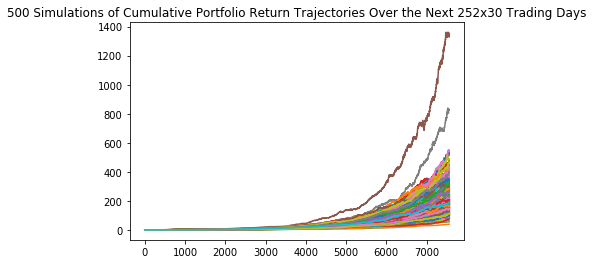

In [74]:
# Visualize the Simulation
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252x30 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [75]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    229.243452
1    107.461049
2    153.171218
3    122.272364
4    223.030299
Name: 7560, dtype: float64

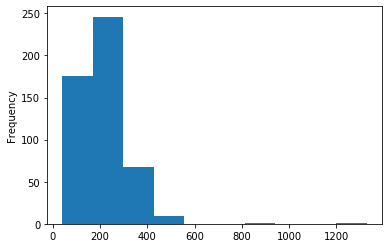

In [76]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
ending_cumulative_returns.plot(kind='hist', bins=10)

In [77]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     98.578946
0.95    383.745109
Name: 7560, dtype: float64

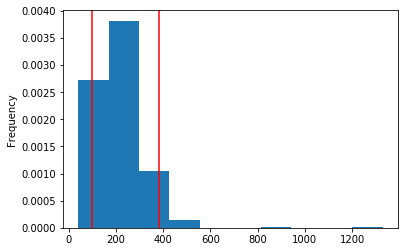

In [78]:
# Visualize the distribution of the ending returns
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 90% confidence interval
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [79]:
confidence_interval_10 = ending_cumulative_returns.quantile(q=[0.45, 0.55])
confidence_interval_50 = ending_cumulative_returns.quantile(q=[0.25, 0.75])
confidence_interval_90 = ending_cumulative_returns.quantile(q=[0.05, 0.95])
print(confidence_interval_10)
print(confidence_interval_50)
print(confidence_interval_90)

0.45    188.409533
0.55    208.945839
Name: 7560, dtype: float64
0.25    149.529673
0.75    262.753022
Name: 7560, dtype: float64
0.05     98.578946
0.95    383.745109
Name: 7560, dtype: float64


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [80]:
# Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound_10 = initial_investment + (initial_investment * confidence_interval_10.iloc[0])
investment_pnl_upper_bound_10 = initial_investment + (initial_investment * confidence_interval_10.iloc[1])
                                                    
# Print the results
print(f"There is a 10% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_10} and ${investment_pnl_upper_bound_10}")


# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound_50 = initial_investment + (initial_investment * confidence_interval_50.iloc[0])
investment_pnl_upper_bound_50 = initial_investment + (initial_investment * confidence_interval_50.iloc[1])
                                                    
# Print the results
print(f"There is a 50% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_50} and ${investment_pnl_upper_bound_50}")




# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound_90 = initial_investment + (initial_investment * confidence_interval_90.iloc[0])
investment_pnl_upper_bound_90 = initial_investment + (initial_investment * confidence_interval_90.iloc[1])
                                                    
# Print the results
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_90} and ${investment_pnl_upper_bound_90}")




There is a 10% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $3788190.6690715323 and $4198916.778309514
There is a 50% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $3010593.453731101 and $5275060.436800675
There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $1991578.920020128 and $7694902.1722361045


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [85]:
#Note: This is basically determining if retirement income is equivalent to current income.
projected_yearly_income = 6085
projected_withdrawal = 0.04*investment_pnl_lower_bound_10
print(f'{projected_withdrawal} is {projected_withdrawal/projected_yearly_income} times higher than current yearly income of {projected_yearly_income}')

151527.6267628613 is 24.90182855593448 times higher than current yearly income of 6085


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [88]:
# Set initial investment
initial_investment_v2 = 20000*1.5

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound_10_v2 = initial_investment_v2 + (initial_investment_v2 * confidence_interval_10.iloc[0])
investment_pnl_upper_bound_10_v2 = initial_investment_v2 + (initial_investment_v2 * confidence_interval_10.iloc[1])

projected_withdrawal_v2 = 0.04*investment_pnl_lower_bound_10_v2

print(f'{projected_withdrawal_v2} is {projected_withdrawal_v2/projected_yearly_income} times higher than current yearly income of {projected_yearly_income}')
print('You can increase the withdrawal rate, if you would like to.')

227291.44014429193 is 37.352742833901715 times higher than current yearly income of 6085
You can increase the withdrawal rate, if you would like to


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE